In [69]:
from AuditoryExercises.Exercise5_Neural_Networks import Y_train
from tensorflow.python.ops.gen_dataset_ops import TensorDataset
!pip install torch==2.7.1 tqdm==4.66.4 scikit-learn==1.4.2 pandas numpy


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [102]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader, TensorDataset

from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    LabelEncoder,
    OneHotEncoder,
    OrdinalEncoder,
)

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import accuracy_score, classification_report

In [71]:
df = pd.read_csv('Datasets/stroke_data.csv')
df.head()

,Unnamed: 0,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,9046,Male,67.0,NaN,NaN,Yes,Private,Urban,228.69,36.6,NaN,1
1,1,51676,Female,61.0,0.0,0.0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,2,31112,Male,80.0,0.0,1.0,Yes,Private,Rural,105.92,32.5,never smoked,1
3,3,60182,Female,49.0,0.0,0.0,Yes,Private,Urban,171.23,34.4,smokes,1
4,4,1665,Female,79.0,1.0,0.0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5110 non-null   int64  
 1   id                 5110 non-null   int64  
 2   gender             5110 non-null   object 
 3   age                5110 non-null   float64
 4   hypertension       4380 non-null   float64
 5   heart_disease      4716 non-null   float64
 6   ever_married       5110 non-null   object 
 7   work_type          5110 non-null   object 
 8   Residence_type     5110 non-null   object 
 9   avg_glucose_level  5110 non-null   float64
 10  bmi                4909 non-null   float64
 11  smoking_status     4599 non-null   object 
 12  stroke             5110 non-null   int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 519.1+ KB


In [73]:
df["stroke"].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [74]:
df.drop(columns=["Unnamed: 0", "id"], inplace=True)

In [75]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,NaN,NaN,Yes,Private,Urban,228.69,36.6,NaN,1
1,Female,61.0,0.0,0.0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0.0,1.0,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0.0,0.0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1.0,0.0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [76]:
df.isnull().sum()

gender                 0
age                    0
hypertension         730
heart_disease        394
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status       511
stroke                 0
dtype: int64

In [77]:
encoder = OrdinalEncoder(categories="auto")

In [78]:
df[["gender"]] = encoder.fit_transform(df[["gender"]])
df[["ever_married"]] = encoder.fit_transform(df[["ever_married"]])
df[["work_type"]] = encoder.fit_transform(df[["work_type"]])
df[["Residence_type"]] = encoder.fit_transform(df[["Residence_type"]])

In [79]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,67.0,NaN,NaN,1.0,2.0,1.0,228.69,36.6,NaN,1
1,0.0,61.0,0.0,0.0,1.0,3.0,0.0,202.21,NaN,never smoked,1
2,1.0,80.0,0.0,1.0,1.0,2.0,0.0,105.92,32.5,never smoked,1
3,0.0,49.0,0.0,0.0,1.0,2.0,1.0,171.23,34.4,smokes,1
4,0.0,79.0,1.0,0.0,1.0,3.0,0.0,174.12,24.0,never smoked,1


In [80]:
df[["smoking_status"]] = encoder.fit_transform(df[["smoking_status"]])
encoder.categories_

[array(['Unknown', 'formerly smoked', 'never smoked', 'smokes', nan],
       dtype=object)]

In [82]:
df["smoking_status"].value_counts()

smoking_status
2.0    1708
0.0    1377
1.0     802
3.0     712
Name: count, dtype: int64

<Axes: >

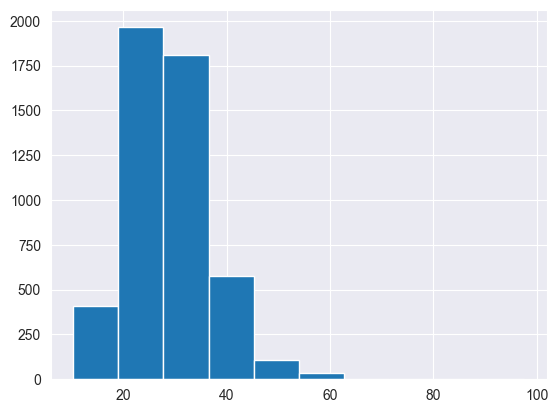

In [87]:
df["bmi"].hist()

In [84]:
median_imputer = SimpleImputer(strategy="median")

In [88]:
df[['bmi']] = median_imputer.fit_transform(df[['bmi']])

In [89]:
knn_imputer = KNNImputer(n_neighbors=31)

In [90]:
df['smoking_status'] = knn_imputer.fit_transform(df[['smoking_status']])
df['heart_disease'] = knn_imputer.fit_transform(df[['heart_disease']])
df['hypertension'] = knn_imputer.fit_transform(df[['hypertension']])

In [91]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [92]:
data_stroke = df.loc[df['stroke'] == 1]
data_stroke.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249 entries, 0 to 248
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             249 non-null    float64
 1   age                249 non-null    float64
 2   hypertension       249 non-null    float64
 3   heart_disease      249 non-null    float64
 4   ever_married       249 non-null    float64
 5   work_type          249 non-null    float64
 6   Residence_type     249 non-null    float64
 7   avg_glucose_level  249 non-null    float64
 8   bmi                249 non-null    float64
 9   smoking_status     249 non-null    float64
 10  stroke             249 non-null    int64  
dtypes: float64(10), int64(1)
memory usage: 23.3 KB


In [93]:
data_no_stroke = df.loc[df['stroke'] == 0]
data_no_stroke.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4861 entries, 249 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4861 non-null   float64
 1   age                4861 non-null   float64
 2   hypertension       4861 non-null   float64
 3   heart_disease      4861 non-null   float64
 4   ever_married       4861 non-null   float64
 5   work_type          4861 non-null   float64
 6   Residence_type     4861 non-null   float64
 7   avg_glucose_level  4861 non-null   float64
 8   bmi                4861 non-null   float64
 9   smoking_status     4861 non-null   float64
 10  stroke             4861 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 455.7 KB


In [94]:
data_no_stroke = data_no_stroke.sample(350)
data_no_stroke.info()

<class 'pandas.core.frame.DataFrame'>
Index: 350 entries, 451 to 4477
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             350 non-null    float64
 1   age                350 non-null    float64
 2   hypertension       350 non-null    float64
 3   heart_disease      350 non-null    float64
 4   ever_married       350 non-null    float64
 5   work_type          350 non-null    float64
 6   Residence_type     350 non-null    float64
 7   avg_glucose_level  350 non-null    float64
 8   bmi                350 non-null    float64
 9   smoking_status     350 non-null    float64
 10  stroke             350 non-null    int64  
dtypes: float64(10), int64(1)
memory usage: 32.8 KB


In [95]:
data = pd.concat([data_no_stroke, data_stroke])
data = data.sample(frac=1)
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
185,1.0,63.0,0.0,0.0,1.0,2.0,0.0,137.30,31.7,1.000000,1
3160,0.0,17.0,0.0,0.0,0.0,2.0,0.0,88.65,30.3,1.381605,0
2881,0.0,62.0,0.0,0.0,1.0,3.0,1.0,91.82,19.6,0.000000,0
44,1.0,60.0,1.0,0.0,1.0,0.0,1.0,213.03,20.2,3.000000,1
1,0.0,61.0,0.0,0.0,1.0,3.0,0.0,202.21,28.1,2.000000,1
...,...,...,...,...,...,...,...,...,...,...,...
2112,1.0,13.0,0.0,0.0,0.0,3.0,1.0,74.19,31.1,1.000000,0
4383,1.0,11.0,0.0,0.0,0.0,4.0,0.0,121.66,16.7,0.000000,0
3826,0.0,75.0,0.0,0.0,1.0,0.0,0.0,94.77,27.2,2.000000,0
1588,0.0,75.0,1.0,0.0,1.0,2.0,1.0,183.00,20.8,0.000000,0


In [96]:
data["stroke"].value_counts()

stroke
0    350
1    249
Name: count, dtype: int64

## Split into Train, Val and Test

In [97]:
X = data.drop(columns=['stroke']).values.astype('float32')
y = data['stroke'].values.astype('float32')

X.shape, y.shape

((599, 10), (599,))

In [98]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)

X_train.shape, X_val.shape

((479, 10), (120, 10))

In [99]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [100]:
X_train_t = torch.tensor(X_train, dtype=torch.float32)
X_val_t = torch.tensor(X_val, dtype=torch.float32)
Y_train_t = torch.tensor(y_train.reshape(-1, 1), dtype=torch.float32)
Y_val_t = torch.tensor(y_val.reshape(-1, 1), dtype=torch.float32)

In [103]:
train_ds = TensorDataset(X_train_t, Y_train_t)
val_ds = TensorDataset(X_val_t, Y_val_t)

train_loader = DataLoader(train_ds, batch_size=10, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=10, shuffle=False)

In [120]:
class StrokeNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(10, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

In [121]:
from torch import optim

model = StrokeNet()

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [122]:
print(model)

StrokeNet(
  (net): Sequential(
    (0): Linear(in_features=10, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=8, bias=True)
    (5): ReLU()
    (6): Linear(in_features=8, out_features=1, bias=True)
    (7): Sigmoid()
  )
)


In [123]:
num_epochs = 20
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    # ---- Train ----
    model.train()
    running_train = 0.0

    for xb, yb in train_loader:
        optimizer.zero_grad()
        outputs = model(xb)
        loss = criterion(outputs, yb)
        loss.backward()
        optimizer.step()
        running_train += loss.item() * xb.size(0)

    epoch_train_loss = running_train / len(train_loader.dataset)

    # ---- Validate ----
    model.eval()
    running_val = 0.0
    with torch.no_grad():
        for xb, yb in val_loader:
            outputs = model(xb)
            loss = criterion(outputs, yb)
            running_val += loss.item() * xb.size(0)

    epoch_val_loss = running_val / len(val_loader.dataset)

    train_losses.append(epoch_train_loss)
    val_losses.append(epoch_val_loss)

    print(f"Epoch {epoch+1}/{num_epochs}, "
          f"train_loss={epoch_train_loss:.4f}, "
          f"val_loss={epoch_val_loss:.4f}")

Epoch 1/20, train_loss=0.7061, val_loss=0.6884
Epoch 2/20, train_loss=0.6599, val_loss=0.6441
Epoch 3/20, train_loss=0.5906, val_loss=0.5735
Epoch 4/20, train_loss=0.5236, val_loss=0.5212
Epoch 5/20, train_loss=0.4885, val_loss=0.5016
Epoch 6/20, train_loss=0.4747, val_loss=0.4947
Epoch 7/20, train_loss=0.4664, val_loss=0.4920
Epoch 8/20, train_loss=0.4652, val_loss=0.4952
Epoch 9/20, train_loss=0.4603, val_loss=0.4952
Epoch 10/20, train_loss=0.4556, val_loss=0.4922
Epoch 11/20, train_loss=0.4541, val_loss=0.4939
Epoch 12/20, train_loss=0.4497, val_loss=0.4965
Epoch 13/20, train_loss=0.4464, val_loss=0.4993
Epoch 14/20, train_loss=0.4438, val_loss=0.5001
Epoch 15/20, train_loss=0.4420, val_loss=0.5038
Epoch 16/20, train_loss=0.4387, val_loss=0.5051
Epoch 17/20, train_loss=0.4353, val_loss=0.5129
Epoch 18/20, train_loss=0.4318, val_loss=0.5139
Epoch 19/20, train_loss=0.4281, val_loss=0.5193
Epoch 20/20, train_loss=0.4255, val_loss=0.5213


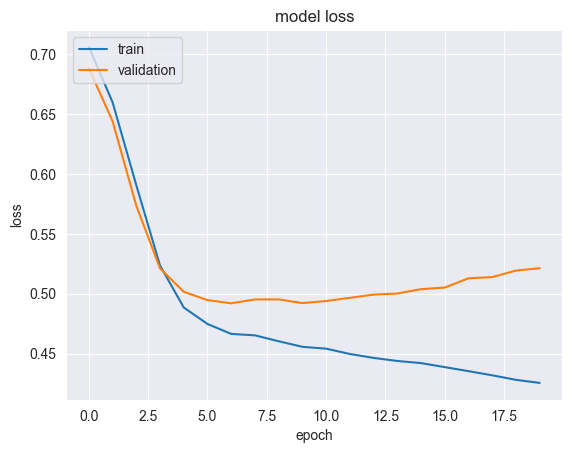

In [124]:
from matplotlib import pyplot as plt

plt.plot(train_losses)
plt.plot(val_losses)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [125]:
model.eval()
with torch.no_grad():
    y_pred = model(X_val_t).numpy().flatten()

y_pred[:10]

array([0.12858203, 0.76697177, 0.20497547, 0.31666052, 0.7160746 ,
       0.4137721 , 0.82153827, 0.75853235, 0.14836602, 0.75977015],
      dtype=float32)

In [126]:
from sklearn.metrics import r2_score
print("r_square score: ", r2_score(Y_val_t,y_pred))

r_square score:  0.30311259681749103
